In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
sales_data = pd.read_csv('./data_files/sales_predictions.csv')
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1) How many rows and columns?
## 2) What are the datatypes of each variable?
## 3) Are there duplicates? If so, drop any duplicates.

In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
print(sales_data.dtypes)

print(sales_data.duplicated().sum())

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
0


## 4) Identify missing values.

In [5]:
sales_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [6]:
#im using interpolate to address the missing values in the Item_Weight column 
#looking at avgs of the two item weights before using interpolate and after they only change by .02
sales_data_inter = sales_data.interpolate()
print('Before:',sales_data['Item_Weight'].mean())
print('After:', sales_data_inter['Item_Weight'].mean())

#changing it on the main DF 
sales_data = sales_data.interpolate()

Before: 12.857645184136183
After: 12.831222280887394


In [7]:
#now to take care of the missing string values in Outlet_Size since there is not a correct way to assume the size of the outlet 
#without seeing it im replaceing all the NaN values with a 'missing' str

sales_data.fillna('Missing', inplace=True)

## 6) Confirm that there are no missing values after addressing them.

In [8]:
sales_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7.) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [9]:
sales_data.groupby('Item_Fat_Content').sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
LF,4038.837083,21.054330,43857.1062,631348,6.552424e+05
Low Fat,65614.964167,326.541080,717390.8394,10167044,1.101503e+07
Regular,36784.992500,200.970026,409413.1214,5771667,6.457454e+06
low fat,1408.102500,7.313655,15071.7328,223539,2.338270e+05
reg,1513.611250,7.764190,15948.6810,233923,2.295765e+05


In [10]:
sales_data.replace(['LF', 'low fat'], 'Low Fat', inplace=True)
sales_data.replace('reg', 'Regular', inplace=True)
sales_data.groupby('Item_Fat_Content').sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
Low Fat,71061.90375,354.909065,776319.6784,11021931,1.190409e+07
Regular,38298.60375,208.734216,425361.8024,6005590,6.687031e+06


## 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [11]:
print('Min:', sales_data['Item_Weight'].min())
print('Max:', sales_data['Item_Weight'].max())
print('Mean:', sales_data['Item_Weight'].mean())

Min: 4.555
Max: 21.35
Mean: 12.831222280887394


In [12]:
print('Min:', sales_data['Item_Visibility'].min())
print('Max:', sales_data['Item_Visibility'].max())
print('Mean:', sales_data['Item_Visibility'].mean())

Min: 0.0
Max: 0.328390948
Mean: 0.06613202877895127


In [13]:
print('Min:', sales_data['Item_MRP'].min())
print('Max:', sales_data['Item_MRP'].max())
print('Mean:', sales_data['Item_MRP'].mean())	

Min: 31.29
Max: 266.8884
Mean: 140.9927819781768


In [14]:
print('Min:', sales_data['Item_Outlet_Sales'].min())
print('Max:', sales_data['Item_Outlet_Sales'].max())
print('Mean:', sales_data['Item_Outlet_Sales'].mean())	

Min: 33.29
Max: 13086.9648
Mean: 2181.2889135750365


# Project 1 - Part 3 (Core)

## Histogram to view the distributions of various features in your dataset

In [15]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


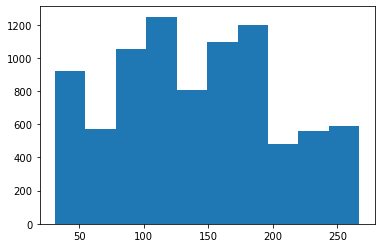

In [16]:
plt.hist(sales_data['Item_MRP'])
plt.show()


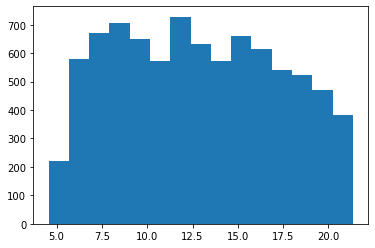

In [17]:
plt.hist(sales_data['Item_Weight'], bins=15)
plt.show()

## Boxplot to view statistical summaries of various features in your dataset.

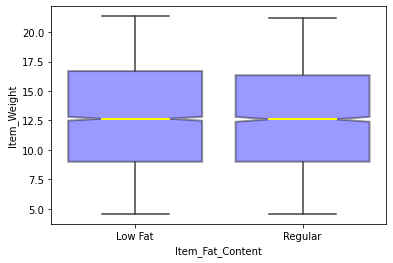

This shows that regardless of the fat content they are relatively the same in weight


In [18]:
sns.boxplot(
    x='Item_Fat_Content', y='Item_Weight', data=sales_data, notch=True, 
    medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
    boxprops = dict(linestyle='-', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))
plt.show()
print('This shows that regardless of the fat content they are relatively the same in weight')

## Heatmap of the correlation between features.

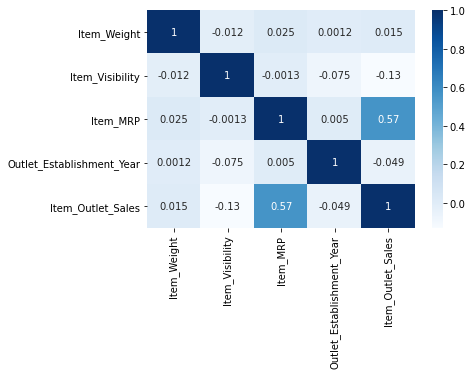

you can see that the Item Mrp and the outlet sales have a good corrolation to eachother mostly due to the fact they both involve pricing data


In [19]:
corr = sales_data.corr()
sns.heatmap(corr, cmap='Blues', annot=True )
plt.show()
print('you can see that the Item Mrp and the outlet sales have a good corrolation to eachother mostly due to the fact they both involve pricing data')

# Project 1 Part 4

In [20]:
total_sales = sales_data.groupby('Outlet_Type').sum().reset_index()
total_sales

,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Grocery Store,13823.82375,113.565873,151939.1470,2156970,3.680343e+05
1,Supermarket Type1,71661.71000,338.651189,787549.8868,11150224,1.291734e+07
2,Supermarket Type2,11946.46500,56.621454,131477.7724,1864352,1.851823e+06
3,Supermarket Type3,11928.50875,54.804764,130714.6746,1855975,3.453926e+06


C:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


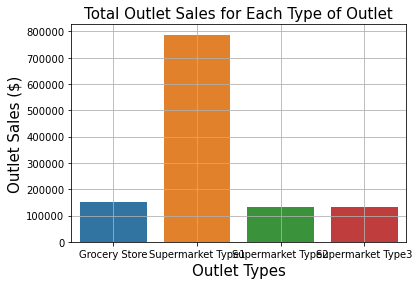

we can see from this graph that the supermarket Type 1 does the best in sales


In [21]:
sns.barplot(total_sales['Outlet_Type'], total_sales['Item_MRP'])
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Outlet Sales for Each Type of Outlet', fontsize=15)
plt.ylabel('Outlet Sales ($)', fontsize=15)
plt.xlabel('Outlet Types',  fontsize=15)
plt.xticks(  fontsize=10)
plt.yticks(fontsize=10)
plt.grid('x')
plt.show()

print('we can see from this graph that the supermarket Type 1 does the best in sales')

In [22]:
fat_content = sales_data.groupby(['Outlet_Type', 'Item_Fat_Content']).count().reset_index()
fat_content.head()

,Outlet_Type,Item_Fat_Content,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,Grocery Store,Low Fat,705,705,705,705,705,705,705,705,705,705
1,Grocery Store,Regular,378,378,378,378,378,378,378,378,378,378
2,Supermarket Type1,Low Fat,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609
3,Supermarket Type1,Regular,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968
4,Supermarket Type2,Low Fat,598,598,598,598,598,598,598,598,598,598


C:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


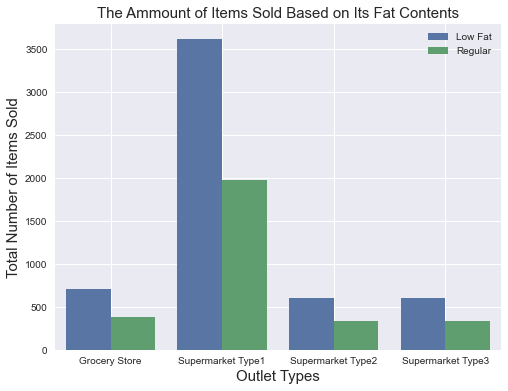

we can see that more people are likely to buy low fat item over regular items regardless of the type of store 


In [23]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
sns.barplot(fat_content['Outlet_Type'],fat_content['Item_Outlet_Sales'], hue=fat_content['Item_Fat_Content'])
plt.ylabel("Total Number of Items Sold", fontsize=15)
plt.xlabel('Outlet Types', fontsize=15)
plt.title('The Ammount of Items Sold Based on Its Fat Contents', fontsize=15)
plt.grid('x')
plt.legend()
plt.show()
print('we can see that more people are likely to buy low fat item over regular items regardless of the type of store ')

In [24]:
avg_item_type_cost = sales_data.groupby(['Outlet_Type','Item_Type']).mean().reset_index()
avg_item_type_cost.head()

,Outlet_Type,Item_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Grocery Store,Baking Goods,12.619471,0.121518,126.438068,1991.423529,292.082544
1,Grocery Store,Breads,12.275833,0.103925,146.452873,1991.696970,381.967442
2,Grocery Store,Breakfast,13.145000,0.132249,147.026989,1991.157895,412.831042
3,Grocery Store,Canned,12.160531,0.098872,138.080808,1991.232877,352.864879
4,Grocery Store,Dairy,13.301866,0.118935,147.166715,1991.076087,341.866589


C:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


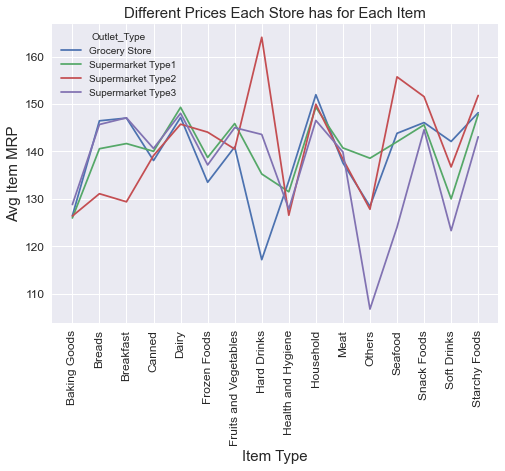

In [25]:
sns.lineplot('Item_Type', 'Item_MRP', hue='Outlet_Type', data=avg_item_type_cost)
plt.xlabel('Item Type', fontsize=15)
plt.ylabel('Avg Item MRP', fontsize=15)
plt.title('Different Prices Each Store has for Each Item', fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Project 1 part 5 Machine Learning

In [26]:
matchine_data = sales_data
#dropping these col as they are specifc to one item and one store no need to have these for predictions as of right now
matchine_data.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
matchine_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Missing,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
matchine_data= pd.get_dummies(
    matchine_data, 
    columns=['Item_Fat_Content','Item_Type' , 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
    )
matchine_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


## Assign the "Item_Outlet_Sales" column as your target and the rest of the variables as your features matrix.

In [28]:
y = matchine_data['Item_Outlet_Sales'].values
X = matchine_data.loc[:, matchine_data.columns]

In [29]:
X.drop('Item_Outlet_Sales',axis=1, inplace=True)
X = X.values

## Be sure to train test split your data set!

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Build a linear regression model.

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [32]:
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train) 

## Evaluate your test set results using r2.

In [33]:
print('R2 Score Train: ', r2_score(y_train, train_pred))

R2 Score Train:  0.5615419192296142


In [34]:
print('R2 Score Test: ', r2_score(y_test,  test_pred))

R2 Score Test:  0.5671479169192718


## Evaluate your test set results using RMSE

In [35]:
print('RMSE Train: ', np.sqrt(mean_squared_error(y_train, train_pred)))

RMSE Train:  1139.1212702481175


In [36]:
print('RMSE Test: ' , np.sqrt(mean_squared_error(y_test, test_pred)))

RMSE Test:  1092.8078816514494


## Which features are most associated with higher predicted sales?

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit scaler on X_train
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
print(reg.coef_)
print(reg.intercept_)

[-5.16188482e+00 -2.20192486e+01  9.83416004e+02  2.39375146e+02
 -1.49448061e+15 -1.49448061e+15  3.12708005e+14  1.93996479e+14
  1.35384790e+14  3.13608199e+14  3.21263661e+14  3.54857649e+14
  4.22520337e+14  1.90733792e+14  2.84553996e+14  3.70083653e+14
  2.52229865e+14  1.67807976e+14  9.60496746e+13  4.14644960e+14
  2.63433213e+14  1.62666483e+14  4.03869995e+14  6.11896475e+14
  5.86937865e+14  5.84563516e+14 -3.89929831e+14 -4.10662097e+14
 -4.27292556e+14 -1.47197195e+15 -2.12043980e+15 -1.39338091e+15
 -1.40969809e+15]
2205.7396052775193


C:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


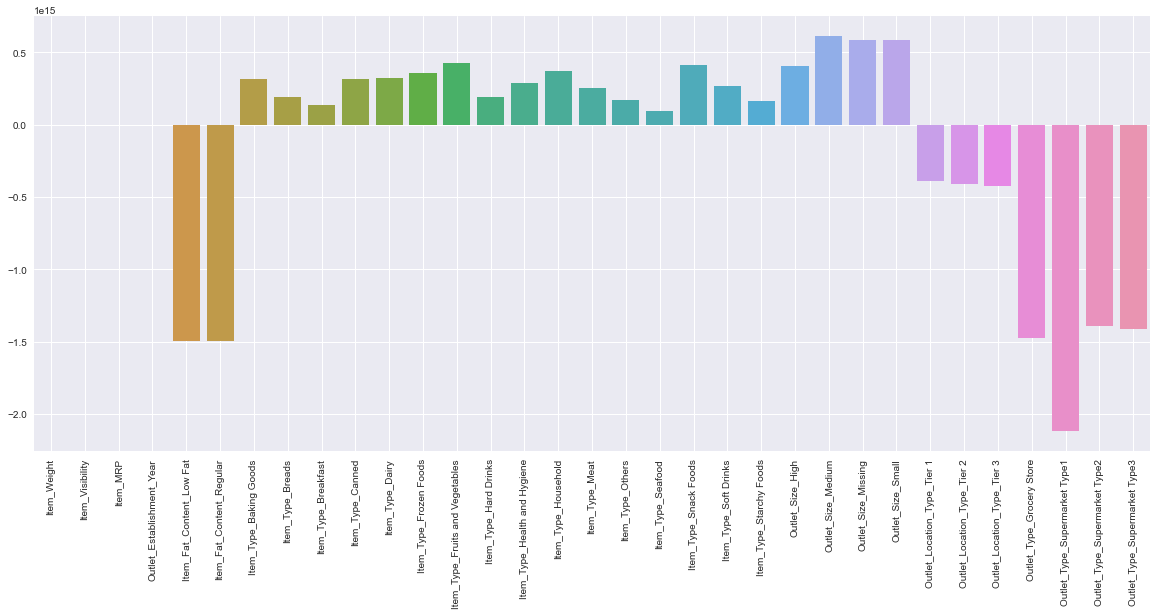

From this graph we can see the features that are associated with higher predicted sales


In [39]:
# getting all the column names
matchine_cols =  matchine_data.loc[:, matchine_data.columns]

#dropping the outlet sales since that wont be apart of the reg.coef_
matchine_cols.drop('Item_Outlet_Sales', axis=1, inplace=True)

#creating graph to show the values from the coef_ (easier to see features that are most associated with higher predicted sales)
plt.figure(figsize=(20,8))
sns.barplot(matchine_cols.columns, reg.coef_)
plt.xticks(rotation=90)
plt.grid('x')
plt.show()
print(
    '''From this graph we can see the features that are associated with higher predicted sales''')